In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [63]:
data = pd.read_csv("heart.csv")

#  Data Processing

In [64]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [65]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [66]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [67]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [68]:
data.duplicated().sum()

0

In [69]:
heart_failure_count = data['HeartDisease'].value_counts()
heart_failure_count

HeartDisease
1    508
0    410
Name: count, dtype: int64

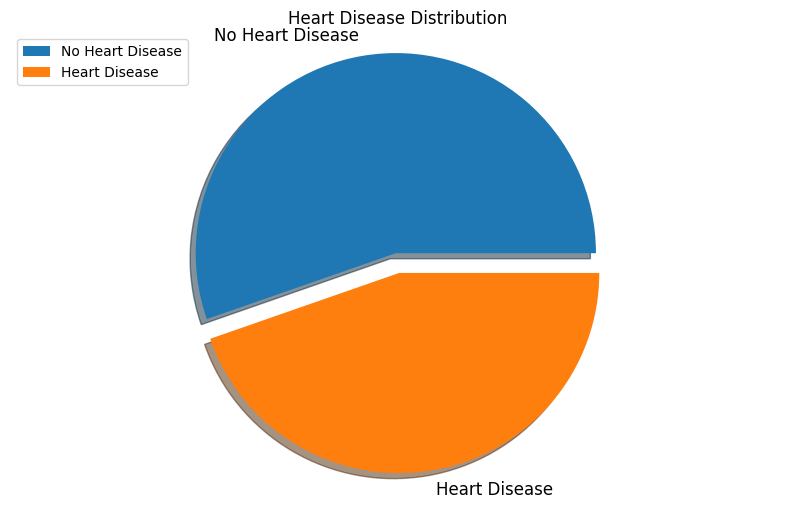

In [70]:
plt.figure(figsize=(10, 6))
plt.pie(heart_failure_count, labels=['No Heart Disease', 'Heart Disease'], explode=(0, 0.1), shadow=True, textprops={'fontsize': 12})
plt.title('Heart Disease Distribution')
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()

#  Categorical Data

In [71]:
c_data = data.select_dtypes(include=['object']).columns.tolist()
c_data

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [72]:
data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

Text(0.5, 1.0, 'Heart Disease Distribution Based on Gender')

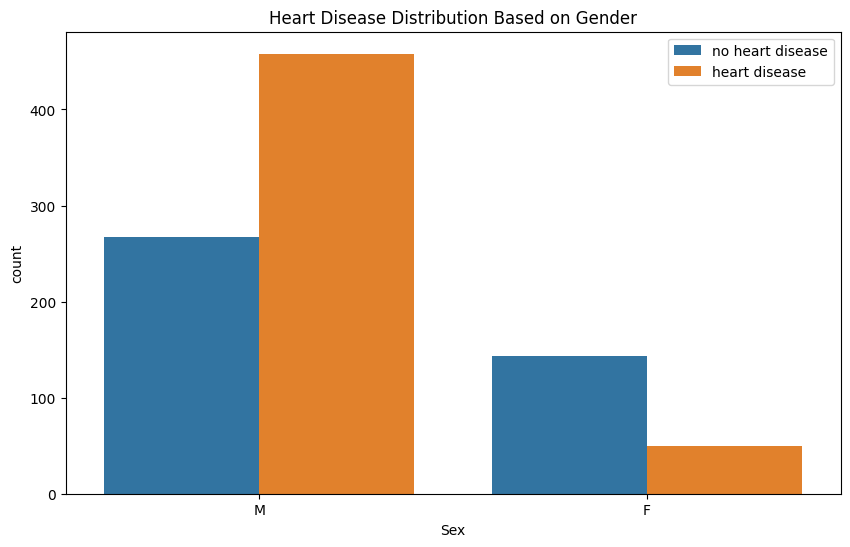

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sex", data=data,hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on Gender')

In [74]:
data.Sex = data.Sex.map({'M':0,'F':1})

In [75]:
data['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Text(0.5, 1.0, 'Heart Disease Distribution Based on Chest Pain Type')

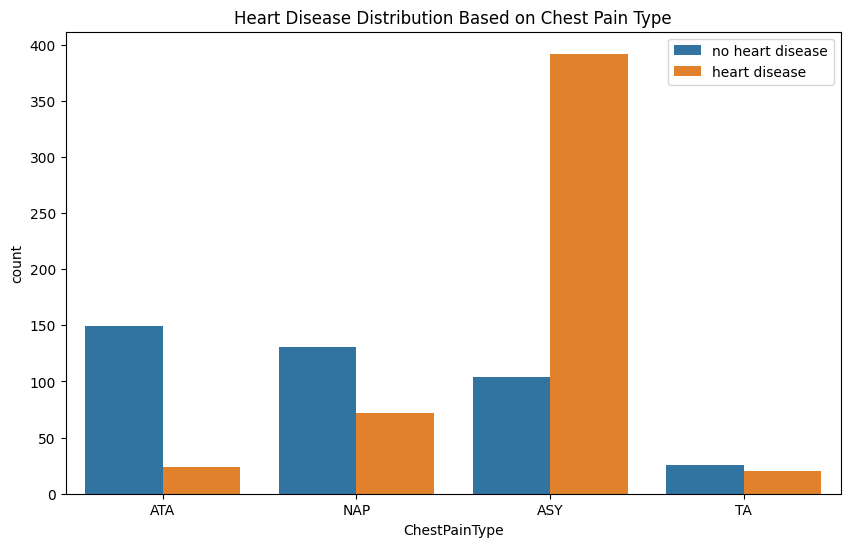

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(x="ChestPainType", data=data, hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on Chest Pain Type')

In [77]:
data.ChestPainType = data.ChestPainType.map({'ATA':0,'NAP':1,'ASY':2,'TA':3})

In [78]:
data['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Text(0.5, 1.0, 'Heart Disease Distribution Based on Resting Electrocardiogram ')

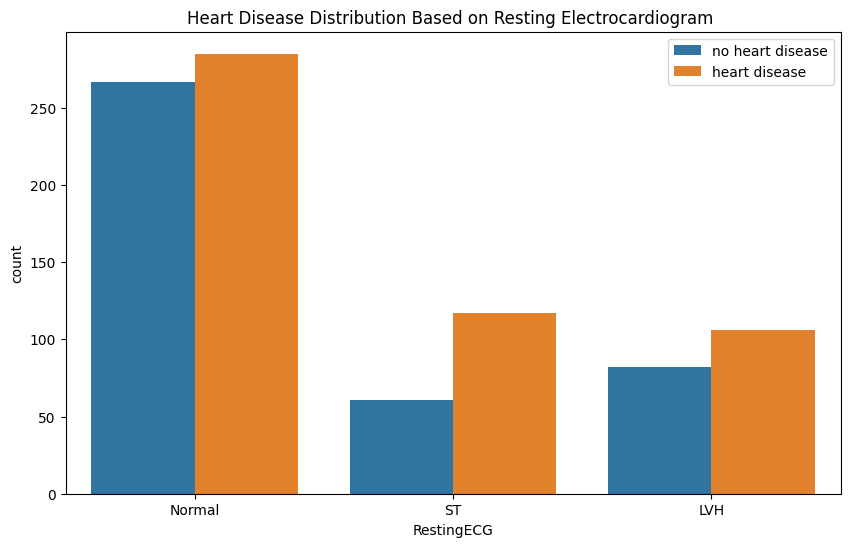

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(x="RestingECG", data=data, hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on Resting Electrocardiogram ')

In [80]:
data.RestingECG = data.RestingECG.map({'Normal':0,'ST':1,'LVH':2})

In [81]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Text(0.5, 1.0, 'Heart Disease Distribution Based on Exercise Angina ')

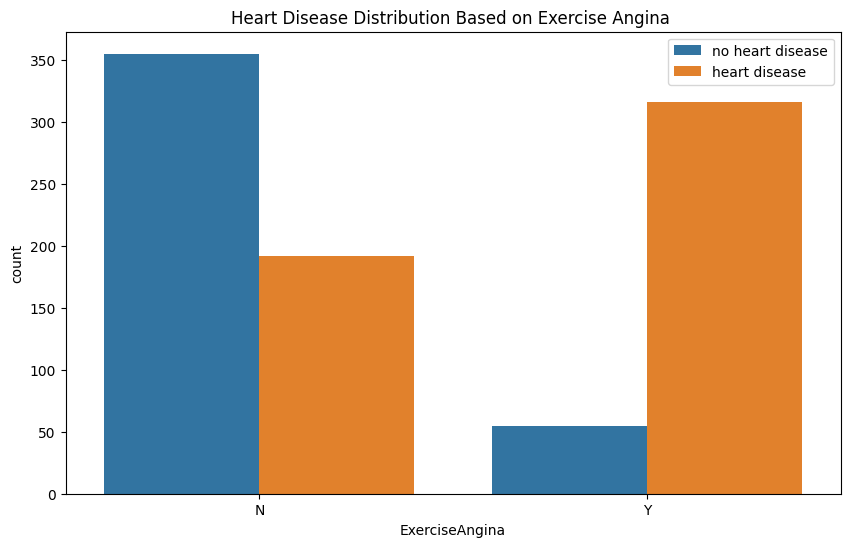

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(x="ExerciseAngina", data=data, hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on Exercise Angina ')

In [83]:
data.ExerciseAngina = data.ExerciseAngina.map({'N':0,'Y':1})

In [84]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

Text(0.5, 1.0, 'Heart Disease Distribution Based on  ST Slope')

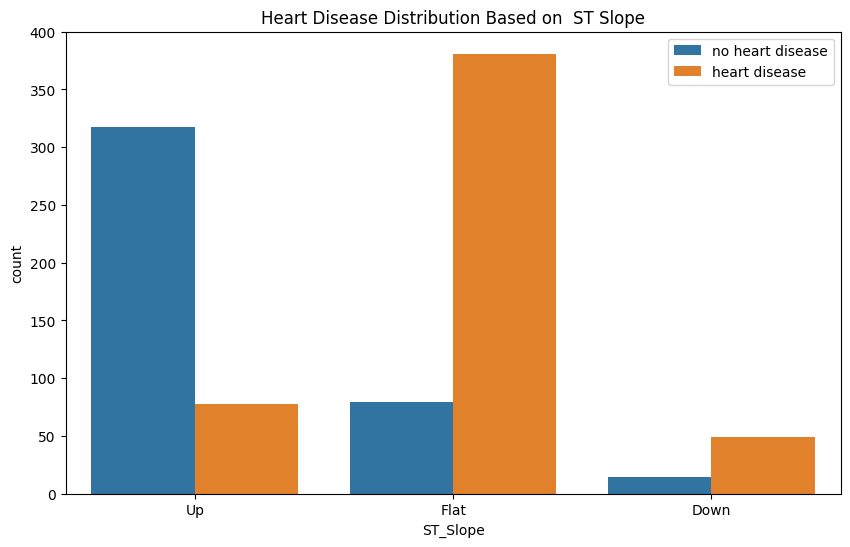

In [85]:
plt.figure(figsize=(10,6))
sns.countplot(x="ST_Slope", data=data, hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on  ST Slope')

In [86]:
data.ST_Slope = data.ST_Slope.map({'Up':0,'Flat':1,'Down':2})

In [87]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


<Axes: >

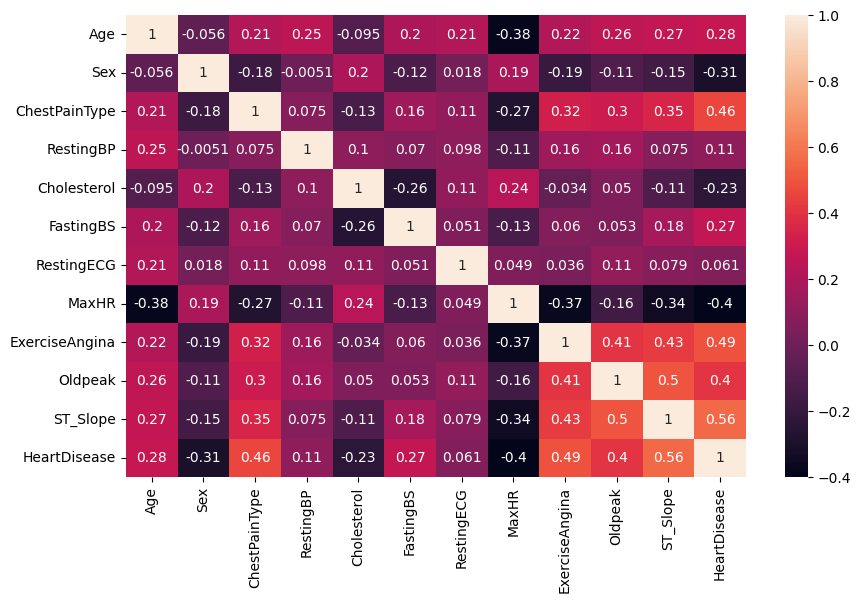

In [88]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

# Model Training

In [89]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X.shape, y.shape

((918, 11), (918,))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



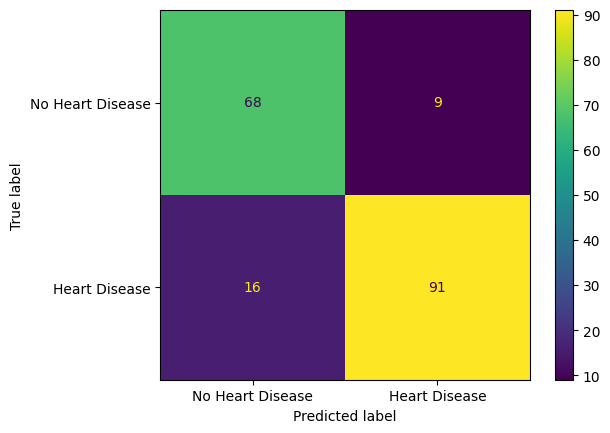

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Heart Disease','Heart Disease']).plot()